In [2]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.341-b10, mixed mode)
  Starting server from C:\Users\liang\AppData\Local\Programs\Python\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\liang\AppData\Local\Temp\tmpxwml8jk4
  JVM stdout: C:\Users\liang\AppData\Local\Temp\tmpxwml8jk4\h2o_liang_started_from_python.out
  JVM stderr: C:\Users\liang\AppData\Local\Temp\tmpxwml8jk4\h2o_liang_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.1
H2O_cluster_version_age:,2 months and 16 days
H2O_cluster_name:,H2O_from_python_liang_3sjehk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.083 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [4]:
df = h2o.import_file(path = "insurance.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
df.head()

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
31,female,25.74,0,no,southeast,3756.62
46,female,33.44,1,no,southeast,8240.59
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1


In [6]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [7]:
# return an output type of the dataframe
df.types

{'age': 'int',
 'sex': 'enum',
 'bmi': 'real',
 'children': 'int',
 'smoker': 'enum',
 'region': 'enum',
 'charges': 'real'}

In [8]:
# return an output type of the dataframe
df.types

{'age': 'int',
 'sex': 'enum',
 'bmi': 'real',
 'children': 'int',
 'smoker': 'enum',
 'region': 'enum',
 'charges': 'real'}

In [9]:
mask = df['charges'] > 0
s1 = df[mask,:]
s1.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr(rows <Expr()#insurance.hex> <Expr(> <Expr(cols_py <Expr()#insurance.hex> 'charges'); scalar> 0); scalar>); scalar>})>

In [10]:
# Create a 75/25 train/test split
pct_rows=0.75
s12_train, s12_test = s1.split_frame([pct_rows])
print(s12_train.shape)
print(s12_test.shape)
s12_train.head()

(982, 7)
(356, 7)


age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.9
18,male,33.77,1,no,southeast,1725.55
28,male,33,3,no,southeast,4449.46
33,male,22.705,0,no,northwest,21984.5
32,male,28.88,0,no,northwest,3866.86
37,female,27.74,3,no,northwest,7281.51
37,male,29.83,2,no,northeast,6406.41
60,female,25.84,0,no,northwest,28923.1
25,male,26.22,0,no,northeast,2721.32
62,female,26.29,0,yes,southeast,27808.7


In [42]:
# Set the features and target
X=s1.columns
print(X)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [43]:
# Set target and predictor variables
y='charges'
X.remove(y)
print(X)


['age', 'sex', 'bmi', 'children', 'smoker', 'region']


In [44]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [45]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

9


## 3. Fit a linear model and interpret the regression coefficients

In [46]:
charges_glm = H2OGeneralizedLinearEstimator( lambda_ = 0,
                      remove_collinear_columns = True,
                      compute_p_values = True)

In [47]:
charges_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1670292061381_33


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              8                             8                              1                       py_5_sid_8b7d

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 37278913.299168155
RMSE: 6105.646018167788
MAE: 4232.2998389865315
RMSLE: NaN
Mean Residual Deviance: 37278913.299168155
R^2: 0.76214710904893
Null degrees of freedom: 981
Residual degrees of freedom: 973
Null deviance: 153909808341.63556
Residual deviance: 36607892859.78313
AIC: 19926.92278571254

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 34672115.39631065
RMSE: 5888.3032697297995
MAE: 4059.6302308734907
RMSLE: NaN
Mean Residual Deviance: 34672115.39631065
R^2: 0.7036996365581107
Null degrees of freedom: 355
Residual degrees of freedom: 347
Null deviance: 42348009997.02812
Residual deviance: 12343273081.086592
AIC: 7210.959129470762

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2       validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ----------------  ------------------  ---------------------  ------------------  ------------------
    2022-12-06 11:55:25  0.000 sec   0             153909808425.5299          156730965.8101119
    2022-12-06 11:55:25  0.003 sec   1                                                           6105.646018167788  37278913.299168155   4232.2998389865315  0.76214710904893  5888.3032697297995  34672115.39631065      4059.6302308734907  0.7036996365581107

Variable Importances: 
variable          relative_importance    scaled_importance    percentage
----------------  ---------------------  -------------------  ------------
smoker.yes        24319.3                1                    0.737191
age               3597.06                0.14791              0.109038
bmi               2192.96                0.0901739            0.0664754
region.southwest  1047.7                 0.0430812            0.0317591
region.southeast  850.155                0.0349581            0.0257708
children          630.257                0.025916             0.019105
sex.male          268.903                0.0110572            0.00815127
region.northwest  82.7789                0.00340384           0.00250928

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [48]:
coeff_table = charges_glm._model_json['output']['coefficients_table']

In [49]:
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-12591.953741,1172.653132,-10.738004,1.695564e-25,8960.675677
1,region.northwest,-82.778891,564.419599,-0.146662,8.834292e-01,-82.778891
2,region.southeast,-850.154787,568.101261,-1.496485,1.348517e-01,-850.154787
3,region.southwest,-1047.702669,568.580822,-1.842663,6.568235e-02,-1047.702669
4,smoker.yes,24319.253760,475.515922,51.142880,5.278189e-278,24319.253760
5,sex.male,-268.902711,392.947079,-0.684323,4.939342e-01,-268.902711
6,age,252.994583,13.858707,18.255280,2.967269e-64,3597.062390
7,bmi,360.072518,34.048721,10.575214,8.124634e-25,2192.961888
8,children,529.445207,164.760385,3.213425,1.354733e-03,630.256915


### From the coeff_table, we can check the z_value according to different variables. Z_value mean that he influence of the independent variable x on the dependent variable y. As a conclusion, I found that smoker is the most important to charges.

### 4. Fit a tree-based model and interpret the nodes

In [50]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [51]:
gbm_params3 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [52]:
gbm_grid3 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid3',
                          hyper_params=gbm_params3)
gbm_grid3.train(x=X, y=y,
                training_frame=s12_train,
                validation_frame=s12_test,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.5,0.1,3.0,1.0,gbm_grid3_model_23,21742992.1765751
,1.0,0.1,3.0,0.8,gbm_grid3_model_6,21887885.2565039
,1.0,0.1,3.0,1.0,gbm_grid3_model_24,22060956.2286287
,0.5,0.1,3.0,0.8,gbm_grid3_model_5,22353650.5198251
,0.5,0.1,5.0,1.0,gbm_grid3_model_29,23083022.4750026
,1.0,0.1,5.0,1.0,gbm_grid3_model_30,23095440.7194064
,0.5,0.1,5.0,0.8,gbm_grid3_model_11,23323235.7303225
,1.0,0.1,5.0,0.8,gbm_grid3_model_12,23644649.6943681
,0.2,0.1,5.0,0.8,gbm_grid3_model_10,23870205.5423356
,0.2,0.1,5.0,1.0,gbm_grid3_model_28,24100352.0811627


In [53]:
gbm_gridperf3 = gbm_grid3.get_grid( sort_by='mse',decreasing=False)

In [54]:
gbm_gridperf3

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,mse
,0.5,0.1,3.0,1.0,gbm_grid3_model_23,21742992.1765751
,1.0,0.1,3.0,0.8,gbm_grid3_model_6,21887885.2565039
,1.0,0.1,3.0,1.0,gbm_grid3_model_24,22060956.2286287
,0.5,0.1,3.0,0.8,gbm_grid3_model_5,22353650.5198251
,0.5,0.1,5.0,1.0,gbm_grid3_model_29,23083022.4750026
,1.0,0.1,5.0,1.0,gbm_grid3_model_30,23095440.7194064
,0.5,0.1,5.0,0.8,gbm_grid3_model_11,23323235.7303225
,1.0,0.1,5.0,0.8,gbm_grid3_model_12,23644649.6943681
,0.2,0.1,5.0,0.8,gbm_grid3_model_10,23870205.5423356
,0.2,0.1,5.0,1.0,gbm_grid3_model_28,24100352.0811627


In [55]:
best_gbm3 = gbm_gridperf3.models[0]

In [56]:
best_gbm_perf3 = best_gbm3.model_performance(s12_test)
best_gbm_perf3.mse

<bound method MetricsBase.mse of H2ORegressionModelMetrics({'_metric_json': {'__meta': {'schema_version': 3, 'schema_name': 'ModelMetricsRegressionV3', 'schema_type': 'ModelMetricsRegression'}, 'model': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid3_model_23', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid3_model_23'}, 'model_checksum': 6145076652323333340, 'frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_6_sid_8b7d', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_6_sid_8b7d'}, 'frame_checksum': 8344972488726769163, 'description': None, 'model_category': 'Regression', 'scoring_time': 1670298945362, 'predictions': None, 'MSE': 21742992.176575102, 'RMSE': 4662.938148482682, 'nobs': 356, 'custom_metric_name': None, 'custom_metric_value': 0.0, 'r2': 0.8141891139148989, 'mean_residual_deviance': 21742992.176575102, 'mae': 2515.6316011601843, 'rmsle': 0.42352202254037

In [57]:
feature_interactions = best_gbm3.feature_interaction()
feature_interactions

[Interaction Depth 0: 
    interaction    gain         fscore    wfscore    average_wfscore    average_gain    expected_gain    gain_rank    fscore_rank    wfscore_rank    avg_wfscore_rank    avg_gain_rank    expected_gain_rank    average_rank    average_tree_index    average_tree_depth
--  -------------  -----------  --------  ---------  -----------------  --------------  ---------------  -----------  -------------  --------------  ------------------  ---------------  --------------------  --------------  --------------------  --------------------
    smoker         1.14674e+11  77        46.3605    0.602084           1.48927e+09     5.64226e+10      1            3              3               1                   1                1                     1.66667         34.2468               0.974026
    children       6.29642e+09  75        29.9695    0.399593           8.39523e+07     2.54999e+09      4            4              5               6                   4                4   

### 5.Use auto ml to find the best model

In [58]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [59]:
aml.train(x=X,y=y,training_frame=s12_train) 

AutoML progress: |
11:55:50.886: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2417.2595,385.31512,2123.1807,2397.7761,2046.9347,2498.4177,3019.9883
mean_residual_deviance,19955260.0000000,7920051.5,11854129.0000000,20969432.0000000,12730965.0000000,23260204.0000000,30961572.0000000
mse,19955260.0000000,7920051.5,11854129.0000000,20969432.0000000,12730965.0000000,23260204.0000000,30961572.0000000
null_deviance,30856482800.0000000,2242024700.0000000,31163453400.0000000,32455370800.0000000,26968893400.0000000,32282687500.0000000,31412011000.0000000
r2,0.8735787,0.0453963,0.9241947,0.8763117,0.9040015,0.8565867,0.8067986
residual_deviance,3908582660.0000000,1528804220.0000000,2358971650.0000000,3984192000.0000000,2533462020.0000000,4628780500.0000000,6037506600.0000000
rmse,4395.493,890.8571,3442.9827,4579.2393,3568.0479,4822.8833,5564.3125
rmsle,0.4002554,0.0368257,0.3611268,0.3926169,0.4118577,0.3785805,0.4570949


In [60]:
# Show leaderboard
print(aml.leaderboard)

model_id                                                             rmse          mse      mae       rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_6_AutoML_2_20221206_115550           4463.42  1.99221e+07  2404.15    0.402222               1.99221e+07
GBM_lr_annealing_selection_AutoML_2_20221206_115550_select_model  4473.07  2.00083e+07  2444.21    0.415767               2.00083e+07
StackedEnsemble_BestOfFamily_4_AutoML_2_20221206_115550           4477.68  2.00496e+07  2417.36    0.404828               2.00496e+07
StackedEnsemble_AllModels_6_AutoML_2_20221206_115550              4477.92  2.00517e+07  2445.74    0.402815               2.00517e+07
GBM_grid_1_AutoML_2_20221206_115550_model_2                       4478.79  2.00595e+07  2423.66    0.414003               2.00595e+07
GBM_grid_1_AutoML_2_20221206_115550_model_29                      4518.01  2.04124e+07  2488.7     0.409587               2.04124e+07
GBM_grid_1_AutoML_2_20221206_115550_model_43                  

In [61]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_s12=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_s12['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1     
models_dict

{'StackedEnsemble_BestOfFamily_6_AutoML_2_20221206_115550': 0,
 'GBM_lr_annealing_selection_AutoML_2_20221206_115550_select_model': 1}

###  Show the best model:

In [62]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

1


In [63]:
best_model.algo

'gbm'

In [64]:
#Show the varible importance in the plot
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

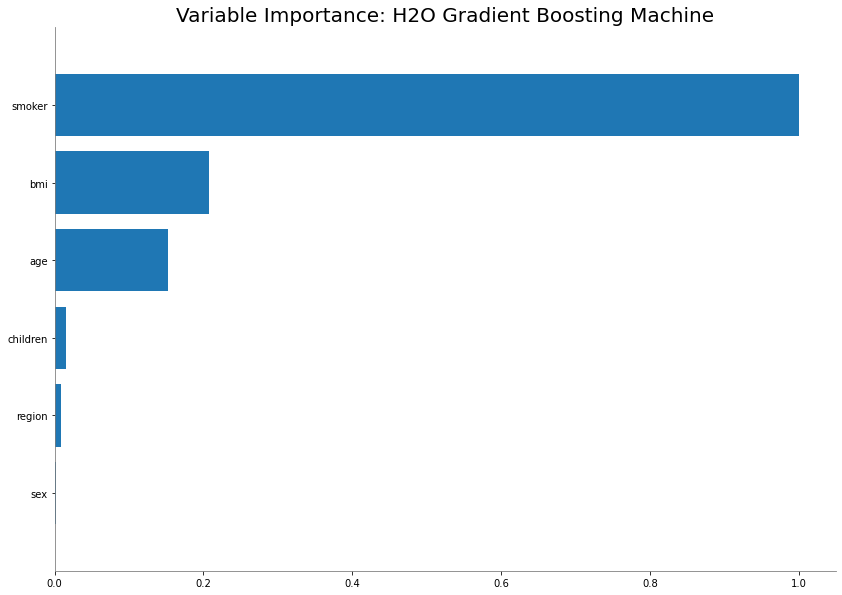

<Figure size 432x288 with 0 Axes>

In [65]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

### From the table, we can find that smoker and bmi has the most important influence on the charges. 

In [66]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
C:\Users\liang\AppData\Local\Temp\ipykernel_21528\4076042168.py:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


In [67]:
#Show the model’s rmse
print(best_model.rmse(train = True))

3853.5864654735847


In [69]:
predictions = best_model.predict(s12_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [70]:
#Show the five prediction value 
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,4256.430871
1,9710.428315
2,11951.506249
3,38869.889534
4,14473.246340


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_lr_annealing_selection_AutoML_2_20221206_115550_select_model on column 'smoker'.
smoker    mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
no        8420.47          3814.52            104.283
yes       31768.8          10643.5            290.977]

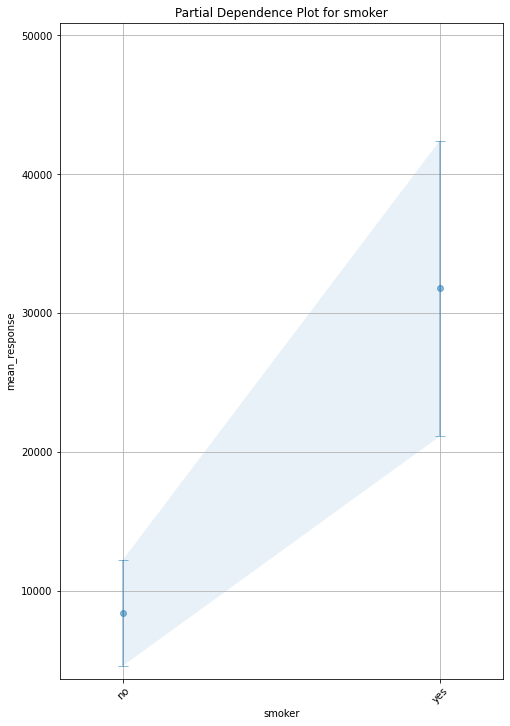

In [73]:
best_model.partial_plot(s1, cols=['smoker'])

### From above picture, we can find the relationship between Bmi and charges.

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GBM_lr_annealing_selection_AutoML_2_20221206_115550_select_model on column 'bmi'.
bmi      mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
15.96    10284.5          5854.88            160.063
17.9163  10580.7          5859.27            160.183
19.8726  10138.9          5830.06            159.384
21.8289  10653            5814.21            158.951
23.7853  10745.6          6235.64            170.472
25.7416  11113.9          6362.41            173.938
27.6979  11532.8          6609.58            180.695
29.6542  11462.5          7323.15            200.203
31.6105  14725.8          12908.3            352.892
33.5668  14719.6          13005.2            355.541
35.5232  15294.7          13673.8            373.818
37.4795  15402.6          14039              383.802
39.4358  15760.3          14283.7            390.491
41.3921  16120.1          14472.1   

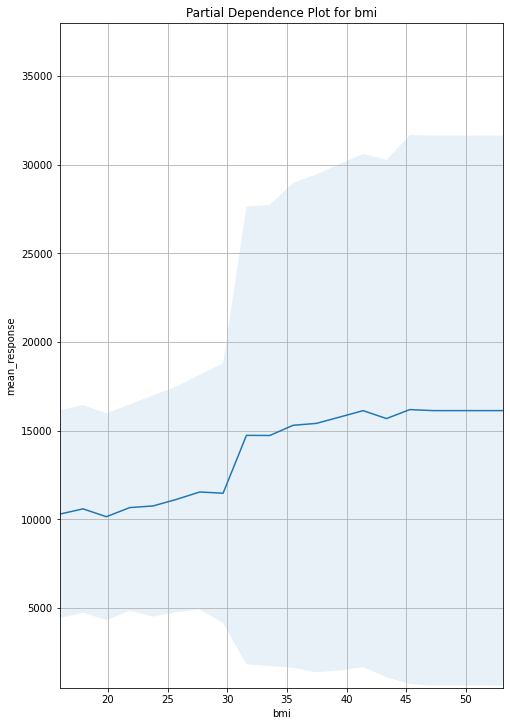

In [75]:
best_model.partial_plot(s1, cols=['bmi'])

### From above picture, we can find the relationship between Bmi and charges.

## Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods. 

### 1. SHAP for GLM model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

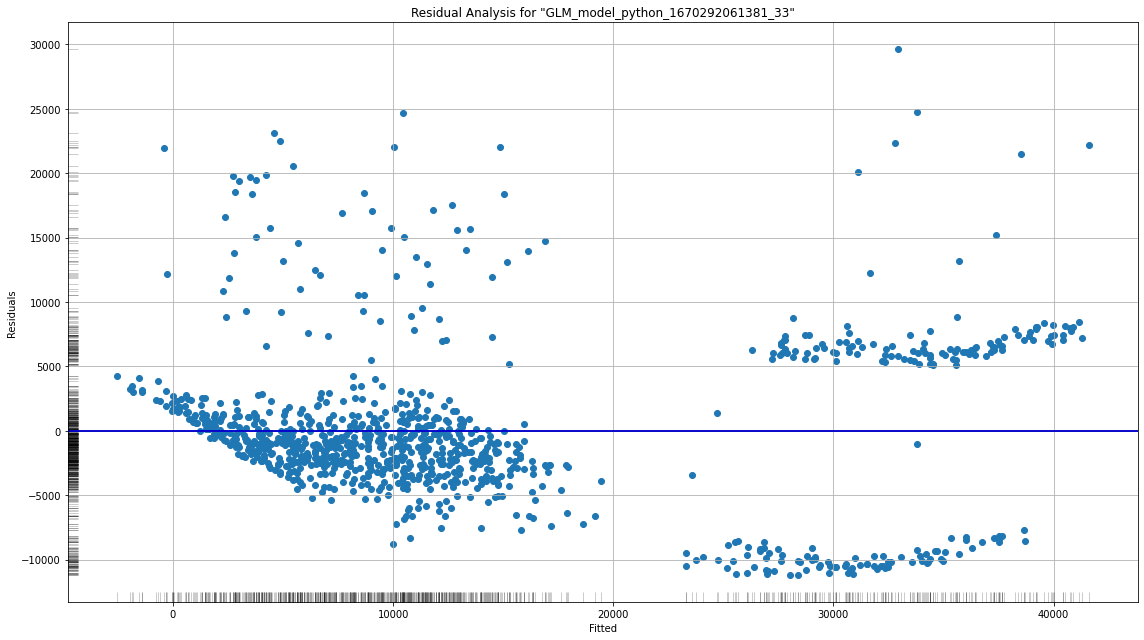

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

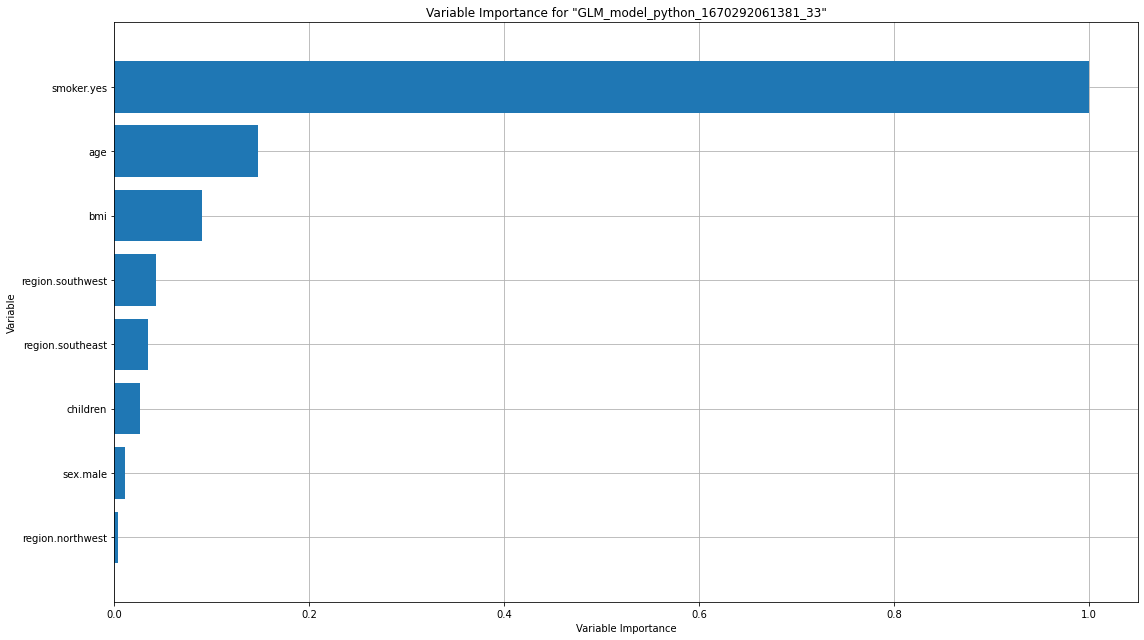

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

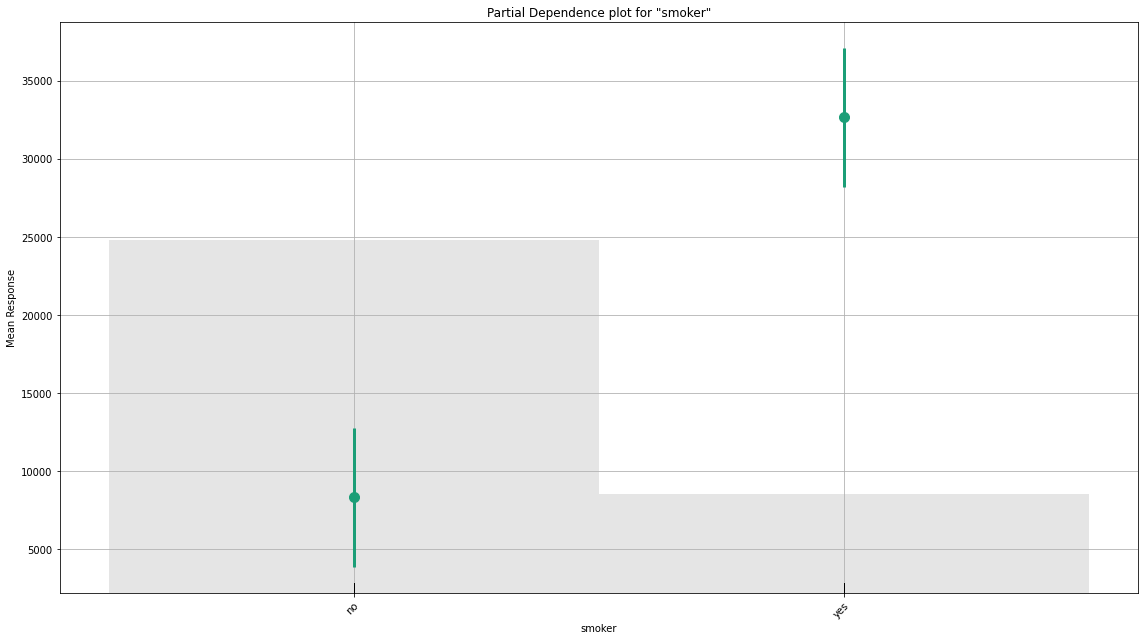

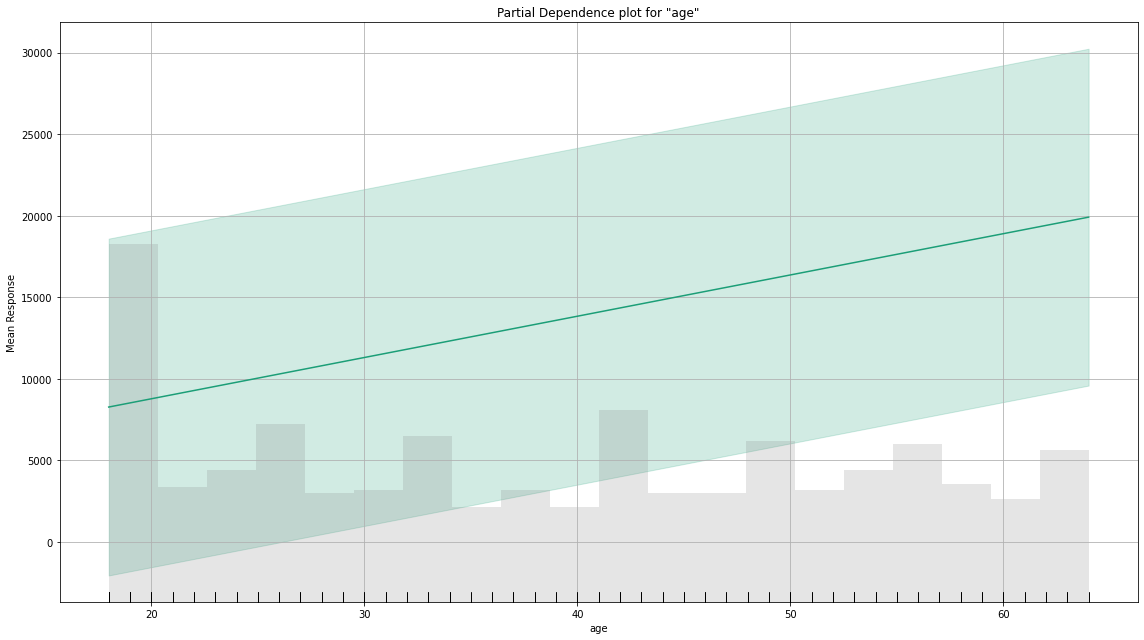

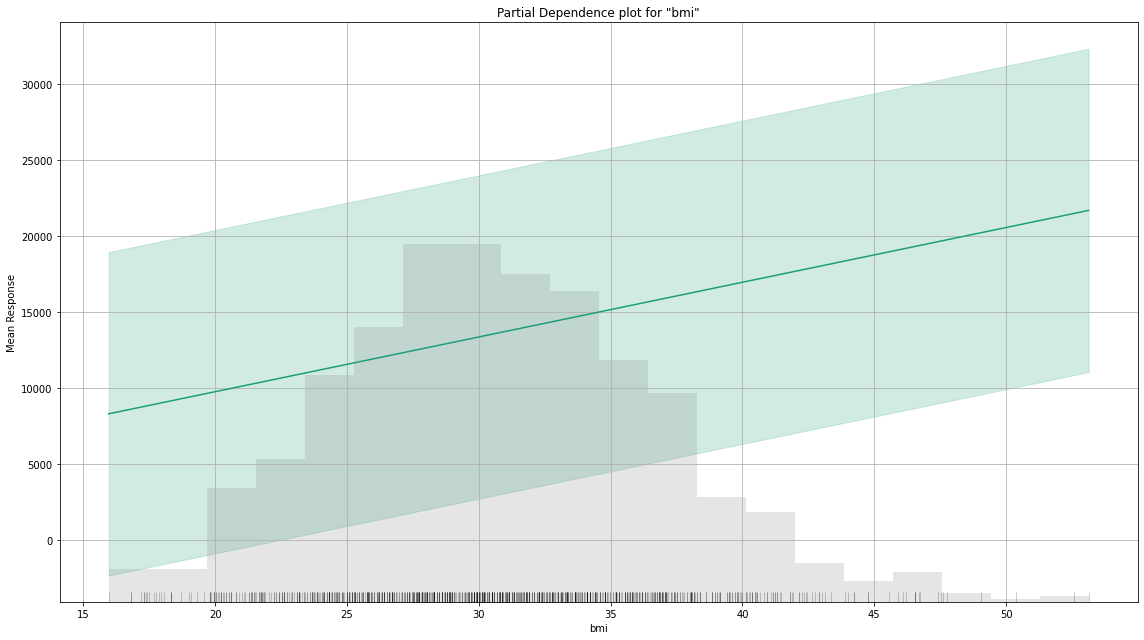

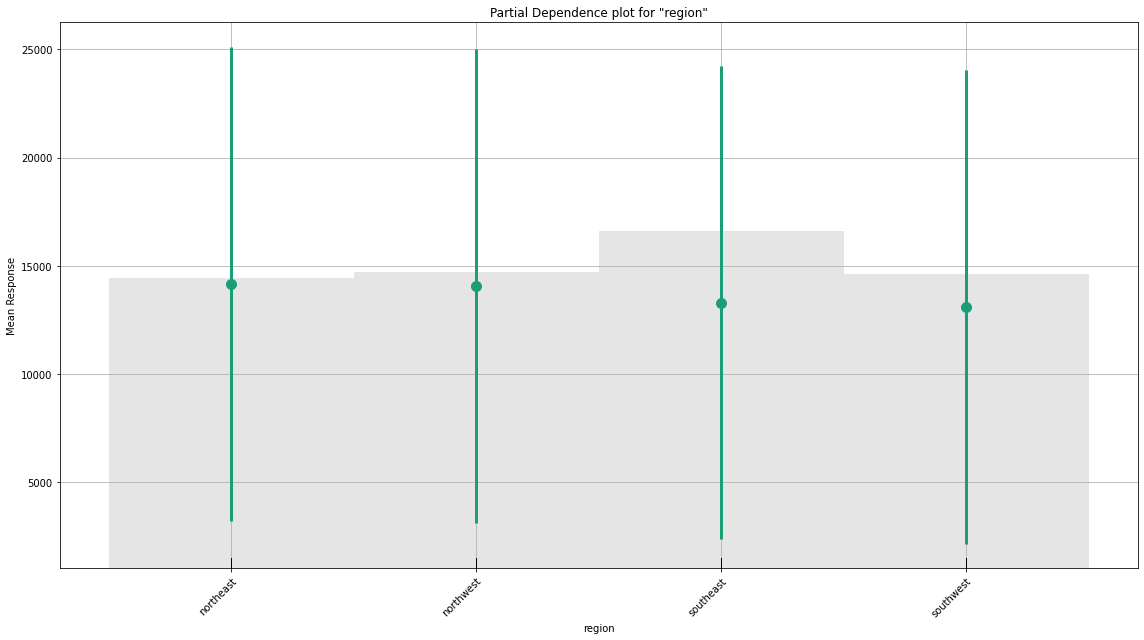

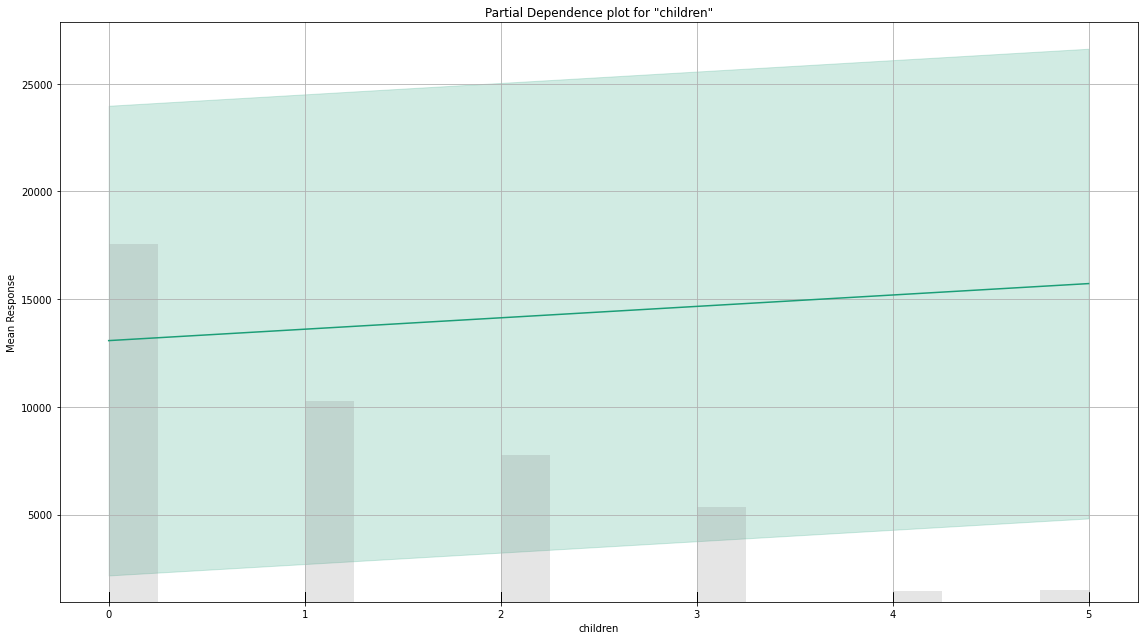

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

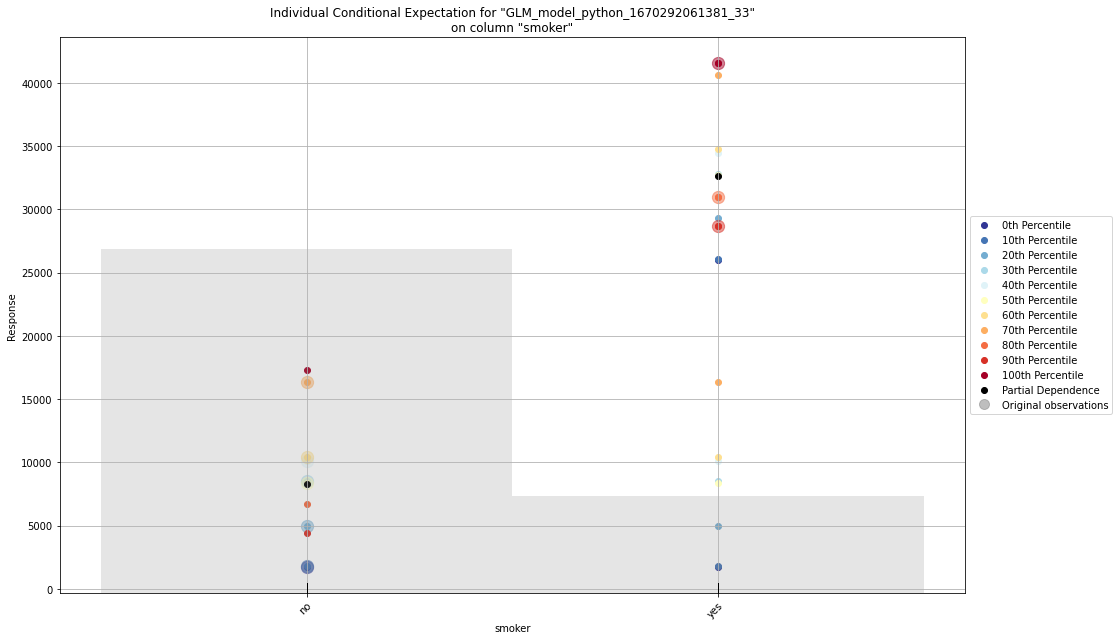

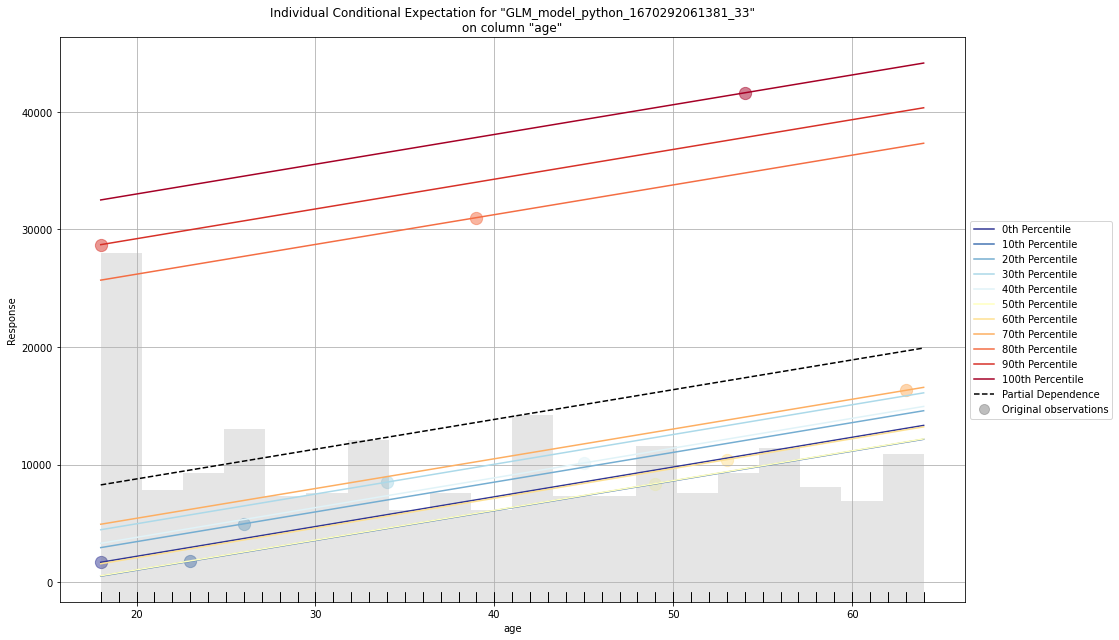

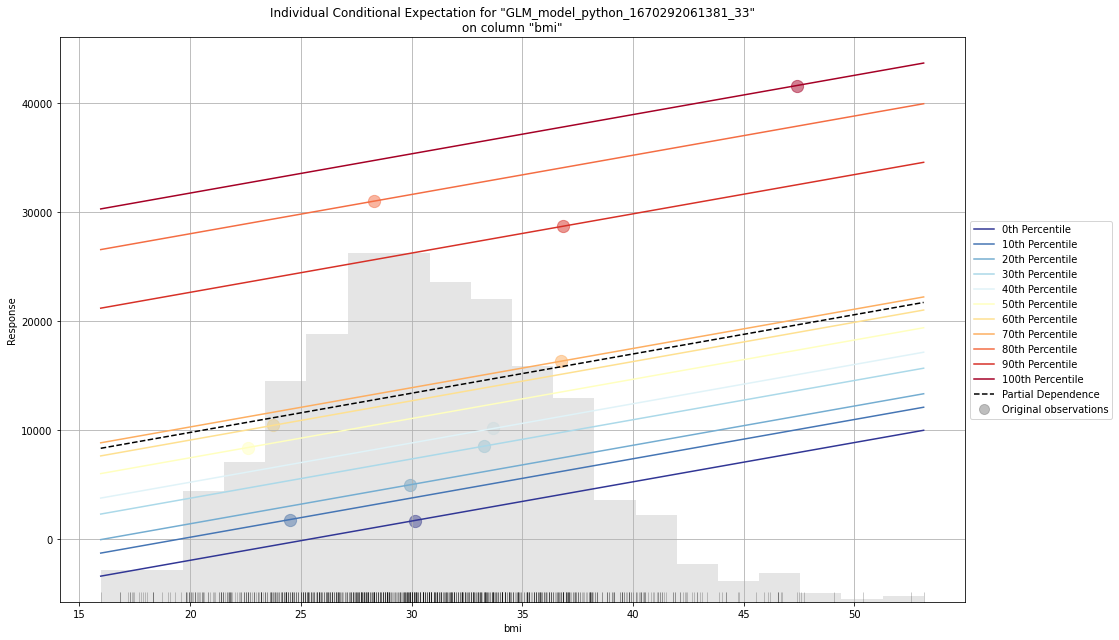

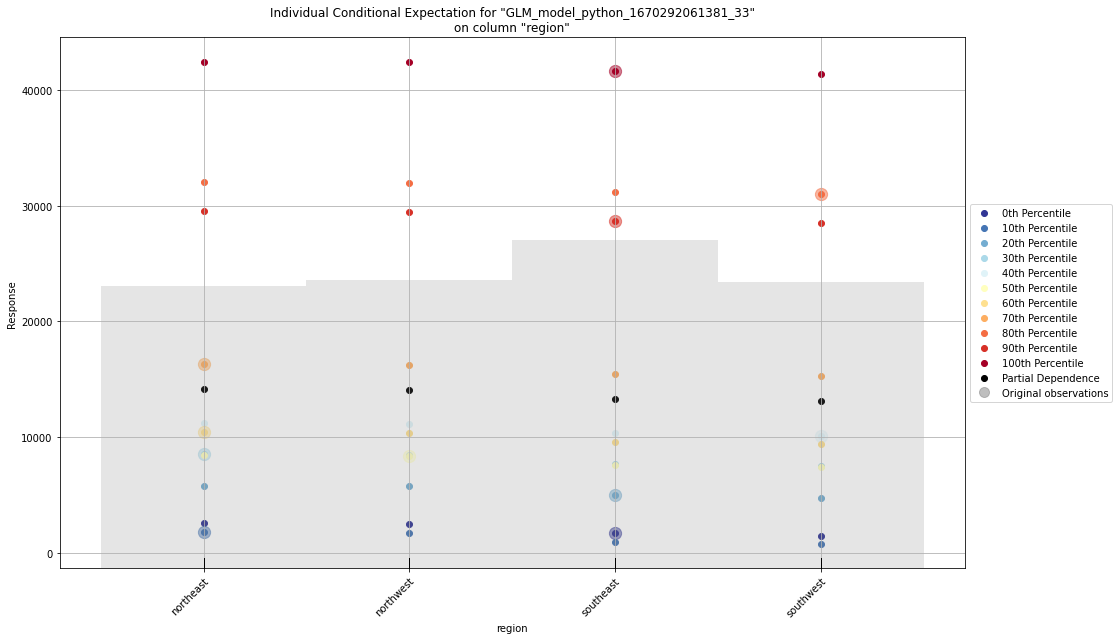

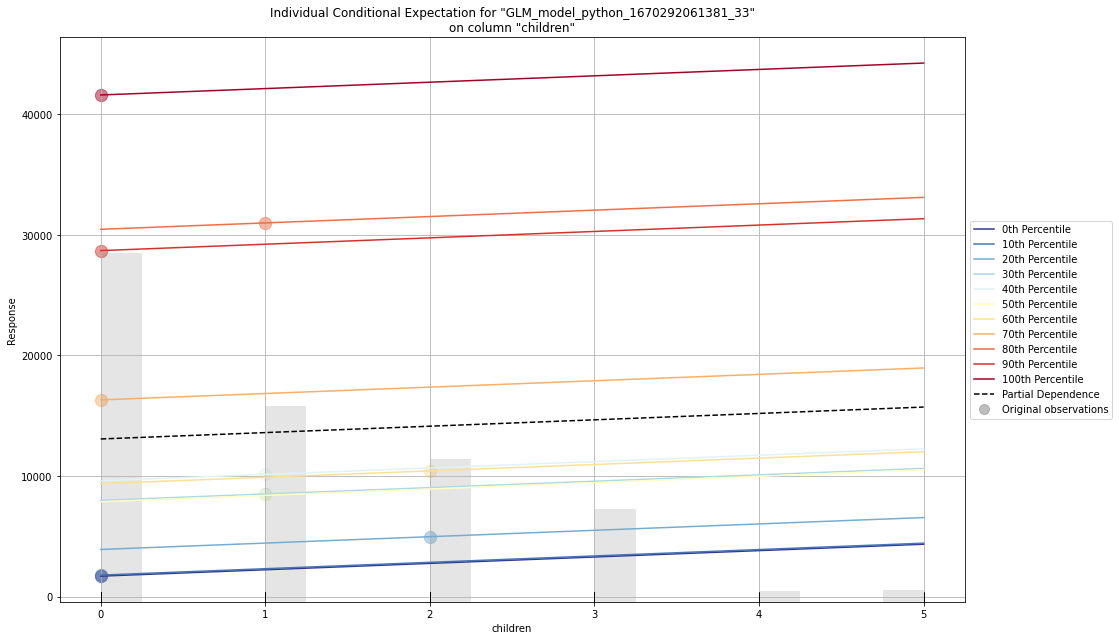

In [78]:
exm = charges_glm.explain(s12_train)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
data = pd.read_csv("insurance.csv")
col=['charges','smoker','age','bmi','region','children','sex']
dt = pd.read_csv("insurance.csv",header=None,skiprows=1,names=col)
r=list(np.arange(len(col)))
#Na_values=-100
dt=pd.read_csv("insurance.csv",header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-100,usecols=r)

In [82]:
dt.tail(130)
dt.dropna(how='all',inplace=True)
print('Missing values:\n\n',dt.shape[0]-dt.count())
clean=(dt.shape[0]-dt.count()).sum()
print("\n")
if(clean==0):
    print("No Missing Values")

Missing values:

 charges     0
smoker      0
age         0
bmi         0
region      0
children    0
sex         0
dtype: int64


No Missing Values


In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression

In [108]:
#Let X-input and Y-input features
X=dt.drop(columns=['charges','region','sex','smoker','children'])     
Y=dt['charges']
X.head()

,age,bmi
0,27.900,0
1,33.770,1
2,33.000,3
3,22.705,0
4,28.880,0


In [109]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.4, random_state=3)

In [110]:
model= LinearRegression()

In [111]:
model.fit(X_train,y_train)

LinearRegression()

In [118]:
import shap
# model
explainer = shap.explainers.Linear(model,X_train)
shap_values=explainer(X)

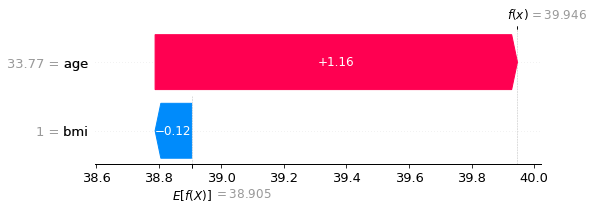

In [119]:
shap.plots.waterfall(shap_values[1])

### From above figure, we can find a positive correlation between age and charges. Instead, bmi is negatively gain for the charges.

### 2. SHAP for GBM model

In [137]:
contributions = best_model.predict_contributions(s12_train)

contributions progress: |████████████████████████████████████████████████████████| (done) 100%


In [139]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().to_numpy()
# shap values are calculated for all features
shap_values = contributions_matrix[:,6]
# expected values is the last returned column
expected_value = contributions_matrix[:,6].min()

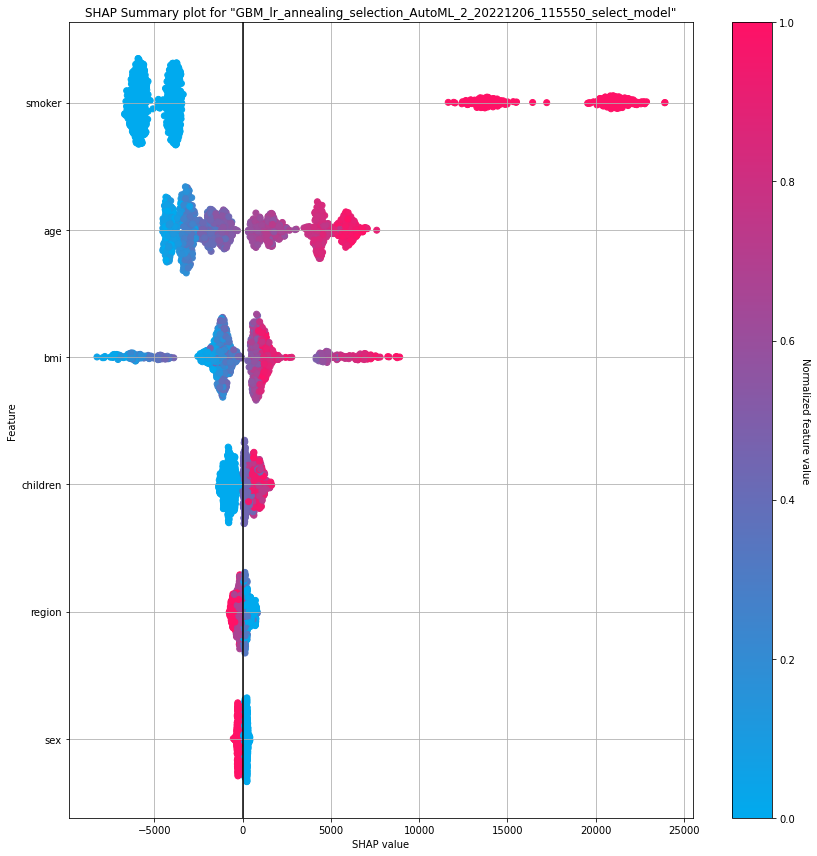

In [141]:
shap_plot = best_model.shap_summary_plot(s12_train)

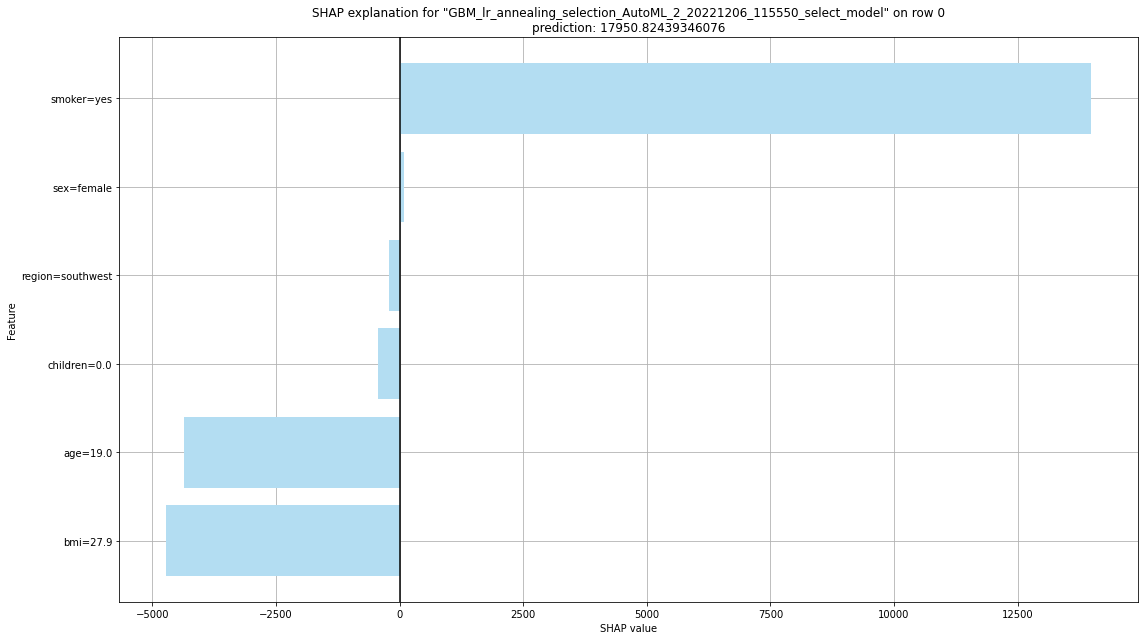

In [160]:
shapr_plot = best_model.shap_explain_row_plot(s12_train, row_index=0)

## Reference:
1.https://github.com/aiskunks/Skunks_Skool/tree/main/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/6105_ML_Data_Cleaning_and_Feature_Selection_Abalone_Example (Training and test dataset)
2.https://www.kaggle.com/code/joachimcaron/eda-and-predicting-insurance-cost (LinearRegression)
3.https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

Copyright (C) <2022><Shuang Liang>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.